# Задание: Найдите смешарика? покемона? собачку? бургер? (50 баллов)

## Описание
Вы получили набор данных, содержащий точки в n-мерном пространстве. Для вас в этом наборе данных был спрятан подарочек. Ваша задача — выяснить, что именно спряталось внутри датасета.

## Что нужно сделать?
1️⃣ Визуализируйте данные с помощью различных методов понижения размерности:
* PCA
* t-SNE (при необходимости с подробом perplexity)
* UMAP (при необходимости с разными параметрами min_dist и n_neighbors)

2️⃣ Попробуйте различные способы окраски точек, чтобы лучше выявить скрытую структуру. Например:
* Окрашивать точки по координатам (X, Y, Z)
* Группировать точки по найденным кластерам
* Рассматривать отдельные кластера точек

3️⃣ Ответьте на вопросы:
* Какая структура спрятана в данных? Визуализируйте подарочек так, чтобы его было хорошо видно. (30 баллов)
* Какие действия мы проделали с данными чтобы спрятать подарочек? (20 баллов)

In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP
from sklearn.cluster import KMeans

/Users/antoninakuznetsova/miniforge3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
hidden_present_df = pd.read_csv('../data/hw2_tricks.csv')
hidden_present_df

,x,y,z
0,-0.669735,-0.561691,-0.490793
1,-0.686597,-0.637112,-0.614833
2,-0.647068,-0.706813,-0.680088
3,0.285184,1.129672,0.671789
4,-0.168509,0.047279,-0.217375
...,...,...,...
3695,1.848465,1.548284,1.563488
3696,1.988457,1.965833,1.417000
3697,1.587604,1.928124,1.780235
3698,1.647539,1.827968,1.693568


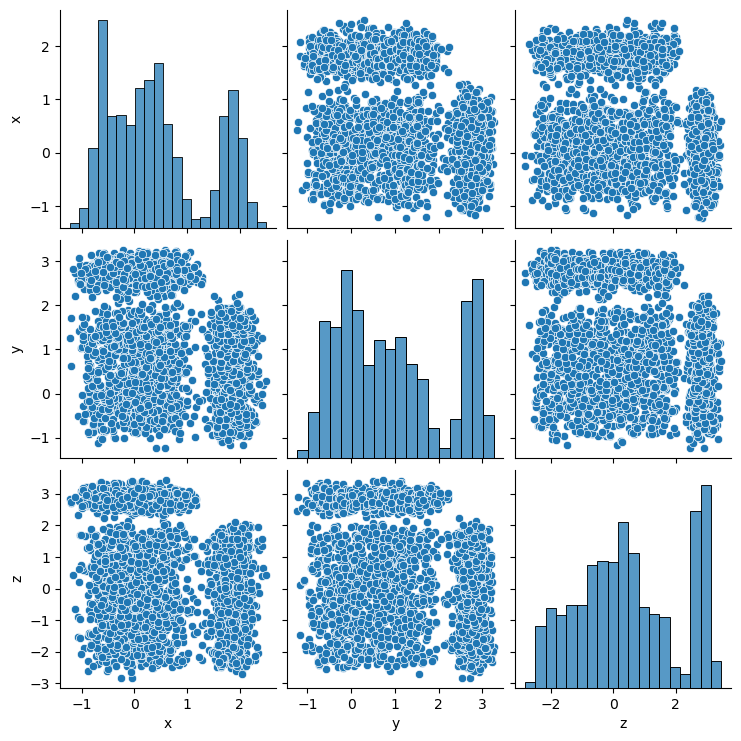

In [3]:
sns.pairplot(hidden_present_df)

In [4]:
# используйте методы уменьшения размерности, чтобы найти подарок

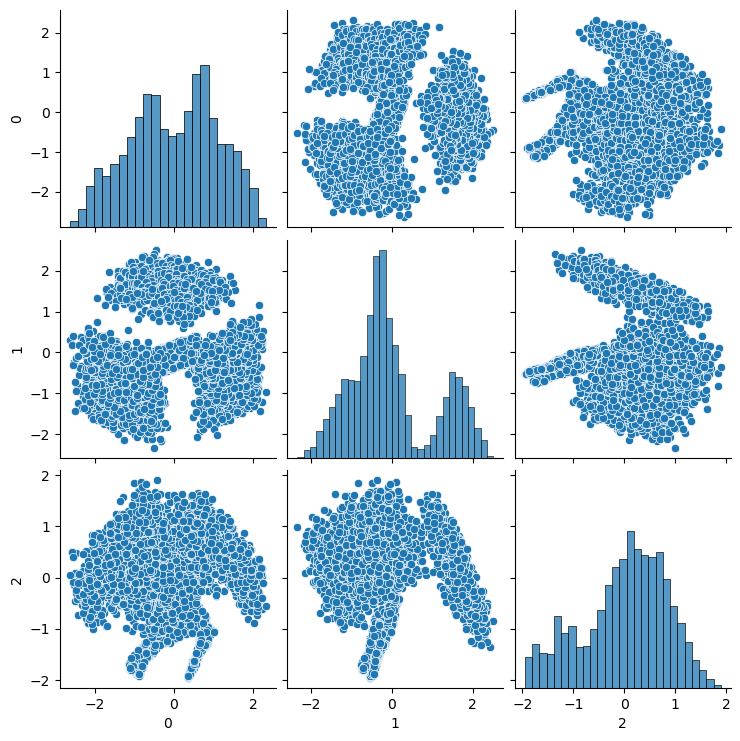

In [5]:
scaler = StandardScaler()
hidden_present_df_standard = scaler.fit_transform(hidden_present_df)

pca = PCA()
principal_components = pd.DataFrame(pca.fit_transform(hidden_present_df_standard))

sns.pairplot(principal_components)

In [6]:
kmeans = KMeans(n_clusters= 4, random_state=42)
clusters = kmeans.fit_predict(principal_components)

In [7]:
principal_components["clusters"] = clusters

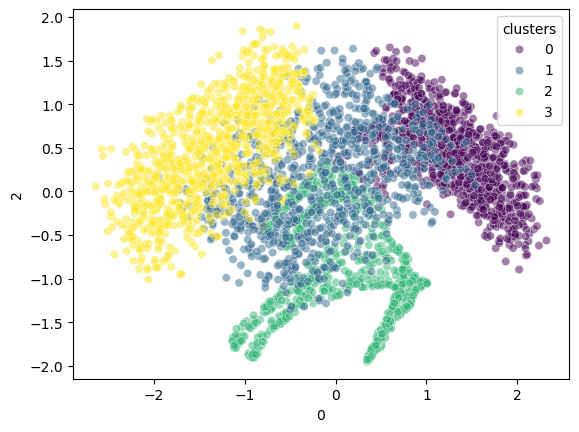

In [8]:
sns.scatterplot(x=principal_components.iloc[:,0], y=principal_components.iloc[:,2], alpha=0.5, hue=principal_components['clusters'], palette="viridis")
plt.show()

In [9]:
df=principal_components[principal_components['clusters'] == 2]

In [10]:
df

,0,1,2,clusters
0,0.475035,-0.430664,-1.727163,2
1,0.437136,-0.455633,-1.815594,2
2,0.383059,-0.511010,-1.841794,2
3,0.178880,0.163010,0.019446,2
4,0.187137,-0.259356,-1.049270,2
...,...,...,...,...
995,0.566438,-0.387726,-1.461480,2
996,-0.879078,-0.447432,-1.870311,2
997,-0.118660,0.171082,-0.135361,2
998,-0.207556,-0.097398,0.113257,2


Это похоже на 4-ного животное с большой головой хех

<Axes: xlabel='0', ylabel='2'>

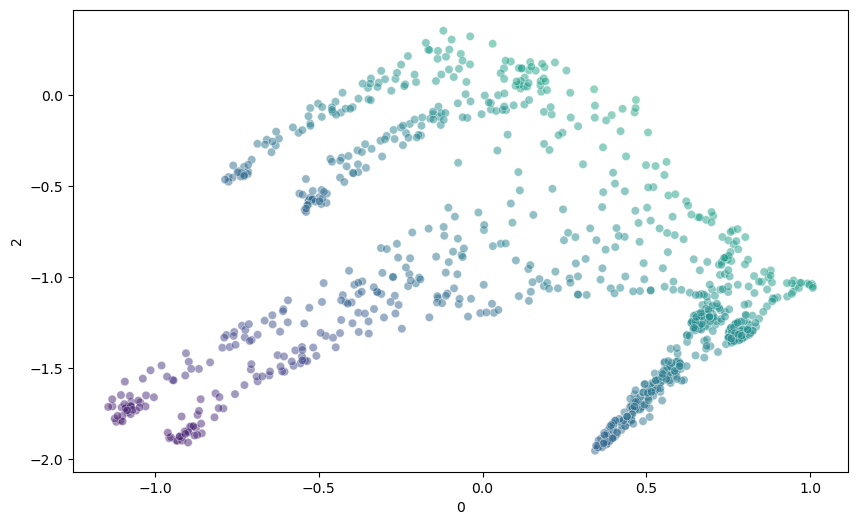

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.iloc[:,0], y=df.iloc[:,2], alpha=0.5, hue=hidden_present_df['z'], palette='viridis', legend=False)

/Users/antoninakuznetsova/miniforge3/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


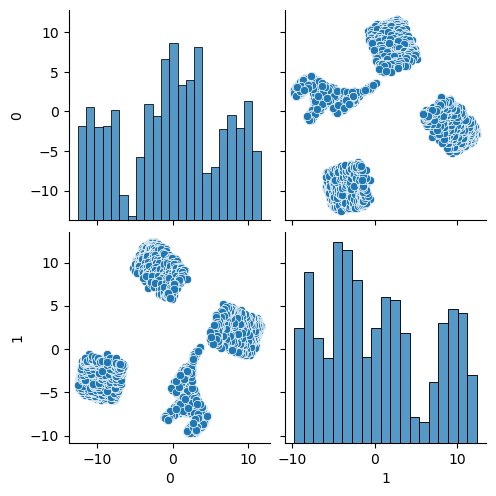

In [12]:
hidden_present_df_tsne = pd.DataFrame(TSNE(n_components=2, perplexity=600, n_iter=1000).fit_transform(hidden_present_df_standard))

sns.pairplot(hidden_present_df_tsne)

In [13]:
clusters_1 = kmeans.fit_predict(hidden_present_df_tsne)
hidden_present_df_tsne['clusters'] = clusters_1

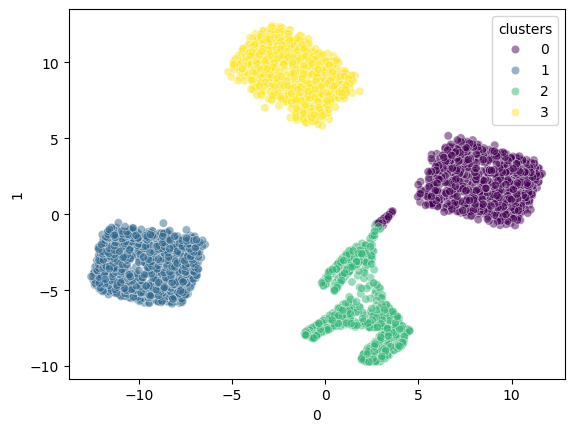

In [14]:
sns.scatterplot(x=hidden_present_df_tsne.iloc[:,0], y=hidden_present_df_tsne.iloc[:,1], alpha=0.5, hue=hidden_present_df_tsne['clusters'], palette="viridis")
plt.show()

In [15]:
df_1=hidden_present_df_tsne[hidden_present_df_tsne['clusters'] == 2]

Голова стала еще больше, похожн на лощадь

<Axes: xlabel='1', ylabel='0'>

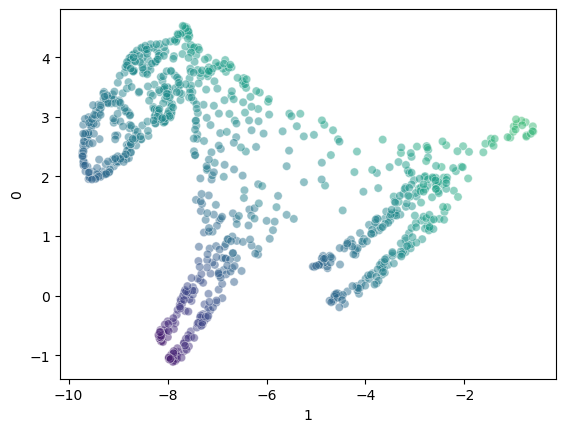

In [16]:
sns.scatterplot(x=df_1.iloc[:,1], y=df_1.iloc[:,0], alpha=0.5, hue=hidden_present_df['z'], palette='viridis', legend=False)

А тут ничего осмысленного не получилось

/Users/antoninakuznetsova/miniforge3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


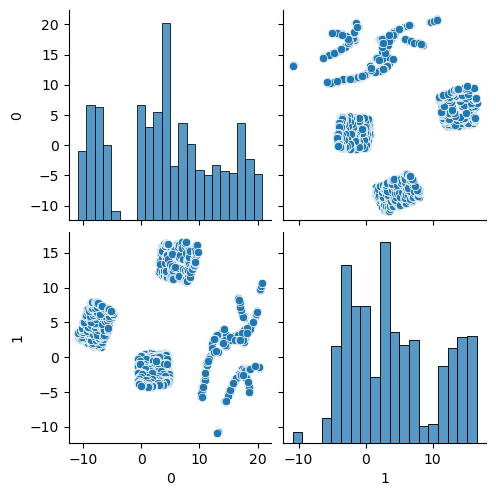

In [17]:
umap_model = UMAP(n_neighbors=10, min_dist=0.1, n_components=2)

umap_result = pd.DataFrame(umap_model.fit_transform(hidden_present_df_standard))

sns.pairplot(umap_result)

In [18]:
# опишите, как мы его спрятали

Если на исходных данных убрать 2 кластера, то у нас отчетливо видна лошадь 

Идеи по тому, как это получилось:
- я уверена, что можно взять векторное изображение и построить его точками
- потом добавить два кластера состоящее из нормального распределения, которые будут выступать как шум
- при уменьшении размерности, два "шумных" кластера должно четко отделиться от наших данных

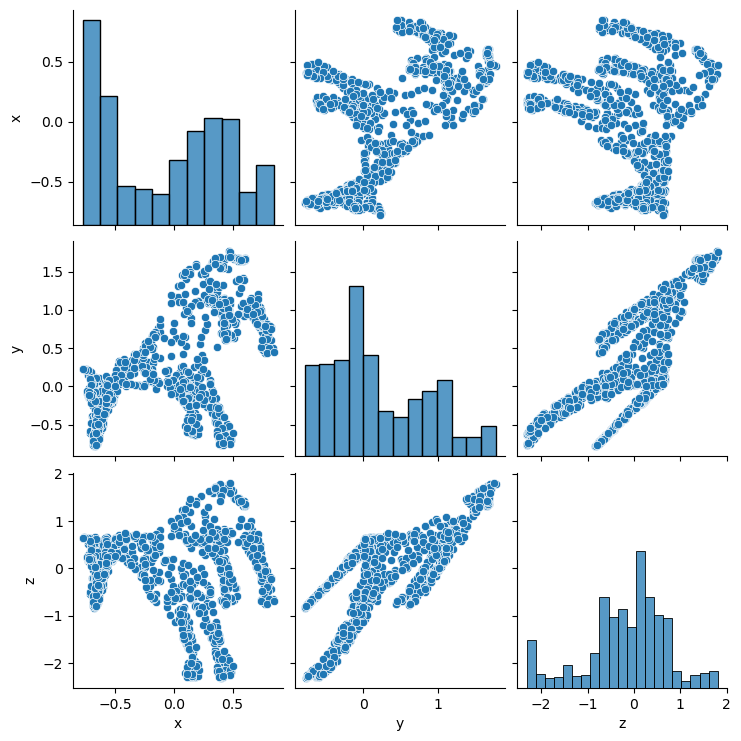

In [19]:
hidden_present_df = hidden_present_df[hidden_present_df['x'] < 1.2]
hidden_present_df = hidden_present_df[hidden_present_df['y'] < 2]
hidden_present_df = hidden_present_df[hidden_present_df['z'] < 2]
sns.pairplot(hidden_present_df)

## Ура! Теперь точно все! Вы сделали всю вторую домашку!
## В качестве бонуса на 10 баллов приложите самую красивую фотку/картинку/мем с объектом в вашем подарочке:)

## Место для рефлексии. Как вам домашка? Что понравилось, что не понравилось? Чего нам поменять?

## Важное напоминание! На следующей неделе весна! Расскажите, какое ваше самое любимое занятие весной? Я начну -- люблю кататься на велике:)

Вторая часть оказаласб сложнее, времени было убито много на самом деле, но в целом пока все понятно

Весной я люблю гулять на солнышке а не делать домашку 😭

На фото я конечно на коне, но с иб я под конем...

![на коне](../data/on_the_horse.JPG)